In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style

In [2]:
N = 250
bit_seq = np.random.randint(0, 2, size=N)

In [3]:
bit_seq

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0])

In [4]:
def detect(bit_seq, pol_ang):
    print(np.cos(pol_ang))
    V_detections = [
        1 if (bit==1) and (np.random.choice([1, 0], p=[np.cos(pol_ang),1-np.cos(pol_ang)])) else 0 
        for bit in bit_seq
    ]
    H_detections = [
        1 if (bit==0) and (np.random.choice([1, 0], p=[np.cos(pol_ang),1-np.cos(pol_ang)])) else 0 
        for bit in bit_seq
    ]
    return V_detections, H_detections


In [24]:
(np.random.random() / 5),

(0.15812080434193002,)

In [5]:
def send_signal(bit_seq, basis):
    alice_pol, bob_pol = np.pi * (np.random.random() / 5), np.pi*(np.random.random() / 5)
    alice_basis, bob_basis = basis[0], basis[1]
    
    if alice_basis == "V":
        alice_V, alice_H = detect(bit_seq, alice_pol)
    else:
        alice_H, alice_V = detect(bit_seq, alice_pol)
    
    if bob_basis == "V":
        bob_V, bob_H = detect(bit_seq, bob_pol)
    else:
        bob_H, bob_V = detect(bit_seq, bob_pol)
    
    return alice_V, alice_H, bob_V, bob_H

In [6]:
send_basis = ["VV", "VH", "HV", "HH"]

In [7]:
density_mat = np.zeros((len(send_basis), len(send_basis)))

for i, s in enumerate(send_basis):
    alice_V, alice_H, bob_V, bob_H = send_signal(bit_seq, s)
    P_VV = np.bitwise_and(alice_V, bob_V).sum() / N
    P_VH = np.bitwise_and(alice_V, bob_H).sum() / N
    P_HV = np.bitwise_and(alice_H, bob_V).sum() / N
    P_HH = np.bitwise_and(alice_H, bob_H).sum() / N
    density_mat[i, :] = np.array([P_VV, P_VH, P_HV, P_HH]) 

0.9984460204862404
0.8602429694884188
0.9193873832022048
0.9952847907025557
0.9992025781801841
0.9125323934519098
0.9667879453808814
0.8112125058513918


In [8]:
HH_VV_mat = np.zeros((len(send_basis), len(send_basis)))
HV_VH_mat = np.zeros((len(send_basis), len(send_basis)))

HH_VV_mat[[0,-1]] = density_mat[[0, -1]]
HV_VH_mat[[1,2]] = density_mat[[1, 2]]

In [12]:
mat = HV_VH_mat
x = []
y = []
dz = []
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        x.append(i)
        y.append(j)
        dz.append(mat[i, j])

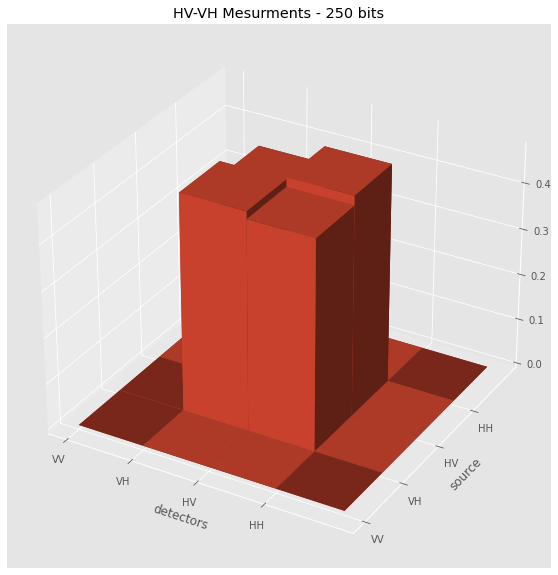

In [13]:
style.use('ggplot')

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')

z3 = [0, 0, 0, 0]*4

dx = np.ones(16)
dy = np.ones(16)
# dz = HH_VV_mat.flatten()

ax1.bar3d(x, y, z3, dx, dy, dz)

ax1.set_xticks(range(len(send_basis)))
ax1.set_yticks(range(len(send_basis)))

ax1.set_xticklabels(send_basis)
ax1.set_yticklabels(send_basis)

ax1.set_xlabel('detectors')
ax1.set_ylabel('source')
# ax1.set_title(f"HH-VV Mesurments - {N} bits")
ax1.set_title(f"HV-VH Mesurments - {N} bits")

plt.show()